In [46]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-04 21:52:25,155: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
!pip install mxnet 
!pip install d2l

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.8/site-packages/decorator-5.1.1.dist-info/METADATA'



In [1]:
from mxnet import autograd, nd, gluon
from mxnet import init
from mxnet.gluon import nn
import d2l
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Traceback (most recent call last):
  Input In [1] in <cell line: 1>
    from mxnet import autograd, nd, gluon
ModuleNotFoundError: No module named 'mxnet'

Use %tb to get the full traceback.


In [69]:
embedding = 4
T = 1000
time = nd.arange(0,T)
x = nd.sin(0.01 * time) + 0.2 * nd.random.normal(shape=T)

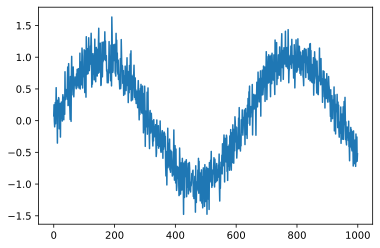

In [70]:
plt.plot(time.asnumpy(), x.asnumpy());

In [71]:
features = nd.zeros((T-embedding, embedding))
for i in range(embedding):
    features[:,i] = x[i:T-embedding+i]
labels = x[embedding:]

In [1]:
ntrain = 100
train_data = gluon.data.ArrayDataset(features[:ntrain,:], labels[:ntrain])
test_data = gluon.data.ArrayDataset(features[ntrain:,:], labels[ntrain:])
      
def get_net():
    net = gluon.nn.HybridSequential()
    net.add(gluon.nn.Dense(20, activation='relu'))
    net.add(gluon.nn.Dense(10, activation='relu'))
    net.add(gluon.nn.Dense(1))
    net.initialize(init.Xavier())
    return net

loss = gluon.loss.L2Loss()

Traceback (most recent call last):
  Input In [1] in <cell line: 2>
    train_data = gluon.data.ArrayDataset(features[:ntrain,:], labels[:ntrain])
NameError: name 'gluon' is not defined

Use %tb to get the full traceback.


In [84]:
def train_net(net, data, loss, epochs, learningrate):
    batch_size = 16
    trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate' : learningrate})
    data_iter = gluon.data.DataLoader(data, batch_size, shuffle=True)
    for epoch in range(1, epochs + 1):
        for x , y in data_iter:
            with autograd.record():
                l = loss(net(x) , y)
            l.backward()
            trainer.step(batch_size)
        l = loss(net(data[:][0]), nd.array(data[:][1]))
        print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))
    return net

In [86]:
net = get_net()
net = train_net(net, train_data, loss, 10, 0.01)

l= loss(net(test_data[:][0]), nd.array(test_data[:][1]))
print('test loss %f' % l.mean().asnumpy())

MXNetError: Traceback (most recent call last):
  File "../src/ndarray/ndarray.cc", line 250
NDArray.Reshape: Check failed: shape_.Size() >= shape.Size() (16 vs. 32) : target shape size is larger than the current shape

ValueError: x and y must have same first dimension, but have shapes (996,) and (967, 2)

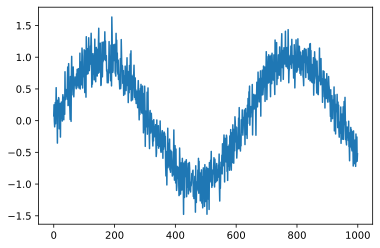

In [87]:
estimates = net(features)
plt.plot(time.asnumpy(), x.asnumpy(), label = 'data');
plt.plot(time[embedding:].asnumpy(), estimates.asnumpy(), label = 'estimate');
plt.legend();

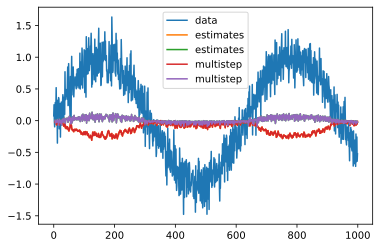

In [78]:
predictions = nd.zeros_like(estimates)
predictions[:(ntrain-embedding)] = estimates[:(ntrain-embedding)]
for i in range(ntrain-embedding, T-embedding):
    predictions[i] = net(predictions[(i-embedding):i].reshape(1,-1)).reshape(1)
    
plt.plot(time.asnumpy(), x.asnumpy(), label= 'data');
plt.plot(time[embedding:].asnumpy(), estimates.asnumpy(), label='estimates');
plt.plot(time[embedding:].asnumpy(), predictions.asnumpy(), label='multistep');
plt.legend();

In [79]:
k = 33
features = nd.zeros((T-k, k))



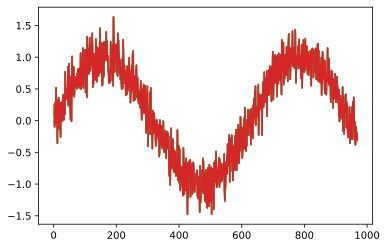

In [80]:
for i in range(embedding):
    features[:,i] = x[i:T-k+i]
    plt.plot(time[i:T-k+i].asnumpy(), features[:,i].asnumpy())

In [81]:
for i in range(embedding, k):
    features[:,i] = net(features[:,(i-embedding):i]).reshape((-1))
    plt.plot(time[i:T-k+i].asnumpy(), features[:,i].asnumpy())

ValueError: operands could not be broadcast together with remapped shapes[original->remapped]: (1934,) and requested shape (967,)

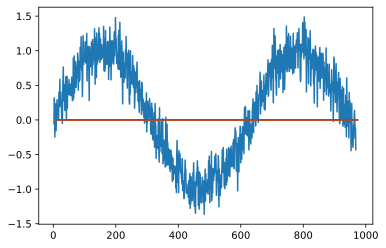

In [65]:
for i in (2, 6, 7, 8):    
    plt.plot(time[i:T-k+i].asnumpy(), features[:,i].asnumpy())
